In [152]:
import numpy as np

In [153]:
np.__version__

'2.0.1'

In [154]:
import matplotlib.pyplot as plt 
%matplotlib inline

## 예제 13-2-1-1 희소행렬 알아보기 

In [155]:
from scipy  import sparse as sp

In [156]:
import networkx as nx

In [157]:
import warnings

In [158]:
warnings.filterwarnings('ignore')

###  Compressed Sparse Row matrix

In [159]:
csr = sp.csr_matrix((3, 4), dtype=np.int8)

In [160]:
csr

<Compressed Sparse Row sparse matrix of dtype 'int8'
	with 0 stored elements and shape (3, 4)>

In [161]:
csr.shape, csr.ndim

((3, 4), 2)

In [162]:
csr.nnz

0

In [163]:
csr.indices, csr.indptr

(array([], dtype=int32), array([0, 0, 0, 0], dtype=int32))

In [164]:
csr.toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [165]:
csr.todense()

matrix([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=int8)

### 실제 데이터와 데이터의 위치를 지정

In [166]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])

In [167]:
csr_ = sp. csr_matrix((data, (row, col)), shape=(3, 3))

In [168]:
csr_

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (3, 3)>

In [169]:
csr_.data

array([1, 2, 3, 4, 5, 6])

In [170]:
csr_.nnz

6

In [171]:
csr_.indices, csr_.indptr

(array([0, 2, 2, 0, 1, 2], dtype=int32), array([0, 2, 3, 6], dtype=int32))

In [172]:
csr_1 = csr_.toarray()

In [173]:
csr_1

array([[1, 0, 2],
       [0, 0, 3],
       [4, 5, 6]])

In [174]:
import networkx as nx

G = nx.from_scipy_sparse_array(csr_, create_using=nx.Graph())


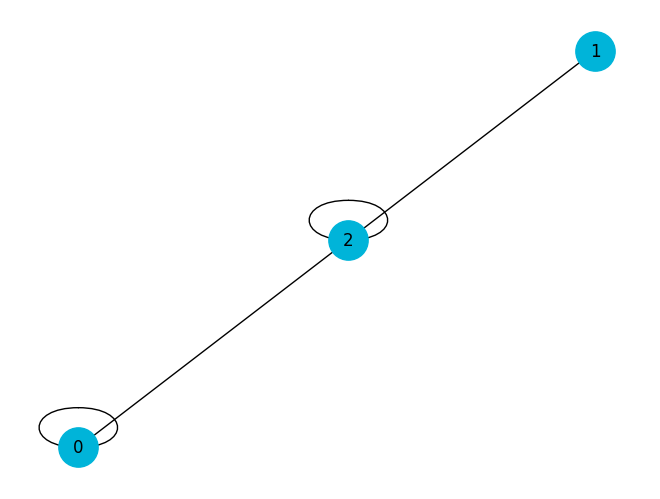

In [175]:
nx.draw(G, with_labels=True, node_size=800,node_color='#00b4d9')

In [176]:
x = np.array([[1,0,0,0],[0,3,0,0] ,[0,1,1,0], [1,0,0,1]])

In [177]:
x

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [178]:
a = sp.csr_matrix(x)

In [179]:
a

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (4, 4)>

In [180]:
for i in a :
    print(i)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1 stored elements and shape (1, 4)>
  Coords	Values
  (0, 0)	1
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1 stored elements and shape (1, 4)>
  Coords	Values
  (0, 1)	3
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (1, 4)>
  Coords	Values
  (0, 1)	1
  (0, 2)	1
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (1, 4)>
  Coords	Values
  (0, 0)	1
  (0, 3)	1


In [181]:
a.toarray()

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [182]:
import networkx as nx

Ga = nx.from_scipy_sparse_array(a, create_using=nx.Graph())


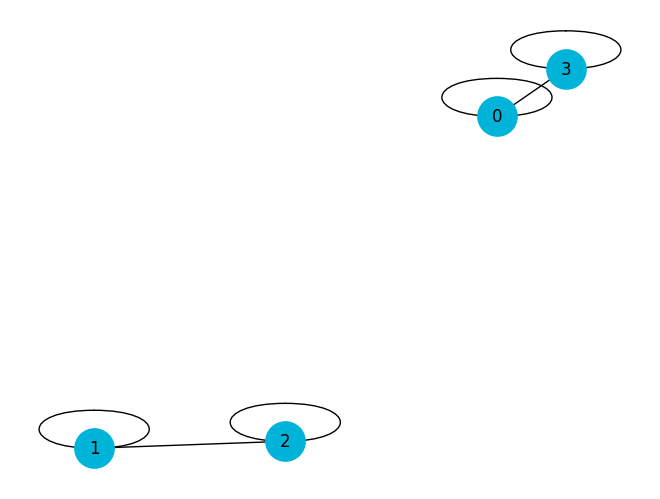

In [183]:
nx.draw(Ga, with_labels=True, node_size=800,node_color='#00b4d9')

In [184]:
import networkx as nx

GA = nx.from_scipy_sparse_array(a, parallel_edges=True, create_using=nx.MultiDiGraph())

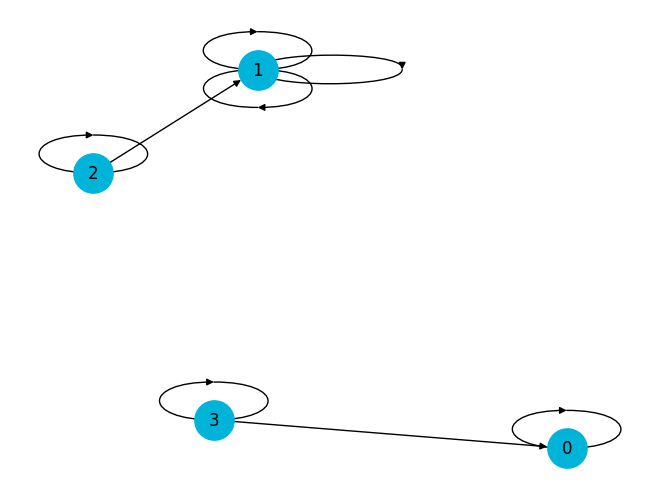

In [185]:
nx.draw(GA, with_labels=True, node_size=800,node_color='#00b4d9')

### csc

In [186]:
b = sp.csc_matrix(x)

In [187]:
b

<Compressed Sparse Column sparse matrix of dtype 'int64'
	with 6 stored elements and shape (4, 4)>

In [188]:
for i in b :
    print(i)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1 stored elements and shape (1, 4)>
  Coords	Values
  (0, 0)	1
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1 stored elements and shape (1, 4)>
  Coords	Values
  (0, 1)	3
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (1, 4)>
  Coords	Values
  (0, 1)	1
  (0, 2)	1
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (1, 4)>
  Coords	Values
  (0, 0)	1
  (0, 3)	1


In [189]:
b.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]])

### lil

In [190]:
c = sp.lil_matrix((4,4))

In [191]:
c

<List of Lists sparse matrix of dtype 'float64'
	with 0 stored elements and shape (4, 4)>

In [192]:
c.data

array([list([]), list([]), list([]), list([])], dtype=object)

In [193]:
c[0,0] = 1

In [194]:
c[1,1] = 1

In [195]:
c[2,2] = c[2,1] = 1

In [196]:
c[3,3] = c[3,0] = 1

In [197]:
c.todense()

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [198]:
import networkx as nx

Gc = nx.from_scipy_sparse_array(c, create_using=nx.Graph())


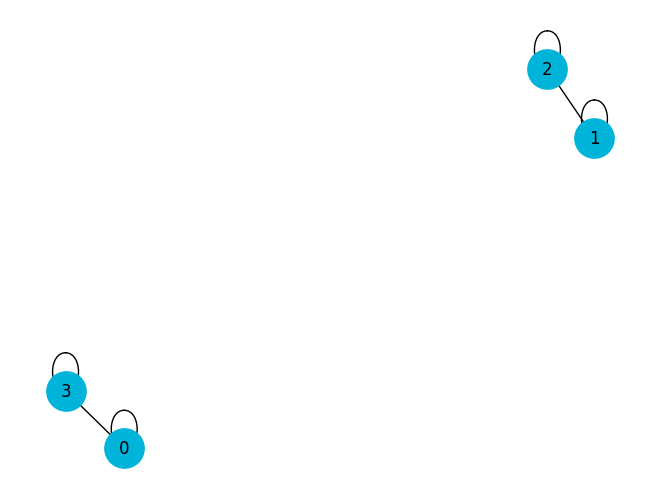

In [199]:
nx.draw(Gc, with_labels=True, node_size=800,node_color='#00b4d9')